In [20]:
# ============================================================
# Exploratory Data Analysis (EDA) - Energy Efficiency Dataset
# ============================================================

# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


# =======================================
# 1. Load Dataset
# =======================================
df = pd.read_excel(r"..\data\Energy Efficiency_data.xlsx")
print(df.head())

# =======================================
# 2. Ganti nama kolom agar mudah dibaca
# =======================================
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


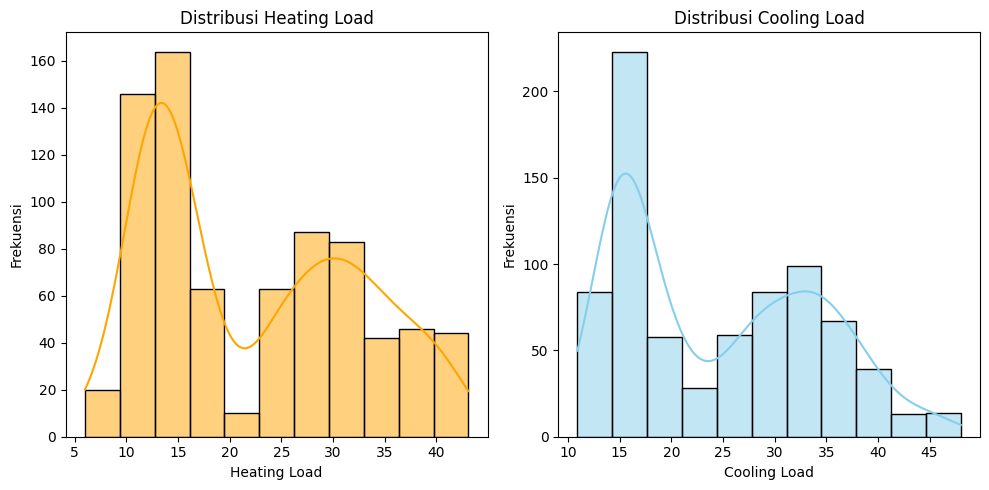

In [21]:
# =======================================
# 3. Visualisasi 1 - Distribusi Heating dan Cooling Load
# =======================================
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Heating_Load'], kde=True, color='orange')
plt.title('Distribusi Heating Load')
plt.xlabel('Heating Load')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.histplot(df['Cooling_Load'], kde=True, color='skyblue')
plt.title('Distribusi Cooling Load')
plt.xlabel('Cooling Load')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

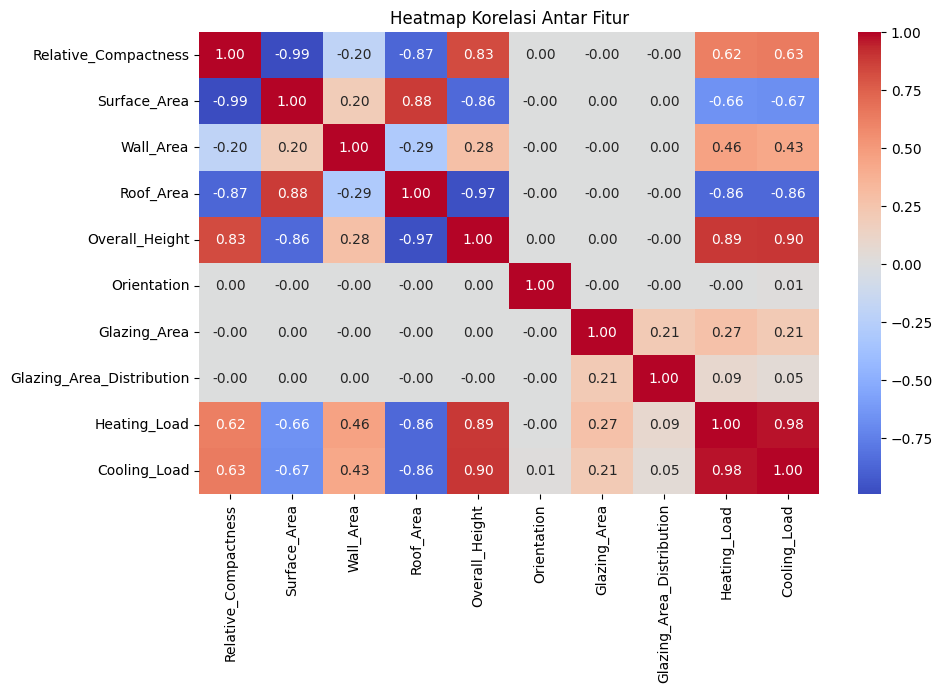

In [22]:
# =======================================
# 4. Visualisasi 2 - Heatmap Korelasi
# =======================================
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

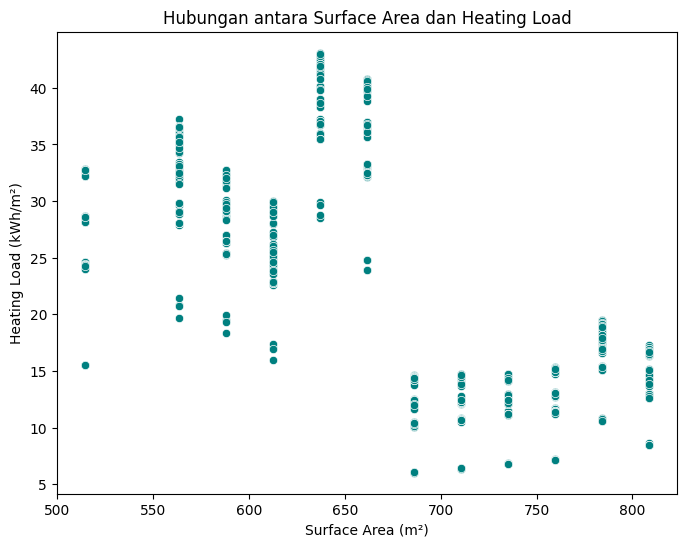

In [23]:
# =======================================
# 5. Visualisasi 3 - Hubungan Surface Area vs Heating Load
# =======================================
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Surface_Area', y='Heating_Load', data=df, color='teal')
plt.title('Hubungan antara Surface Area dan Heating Load')
plt.xlabel('Surface Area (m²)')
plt.ylabel('Heating Load (kWh/m²)')
plt.show()

Jumlah Missing Values tiap Kolom:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Jumlah data duplikat: 0


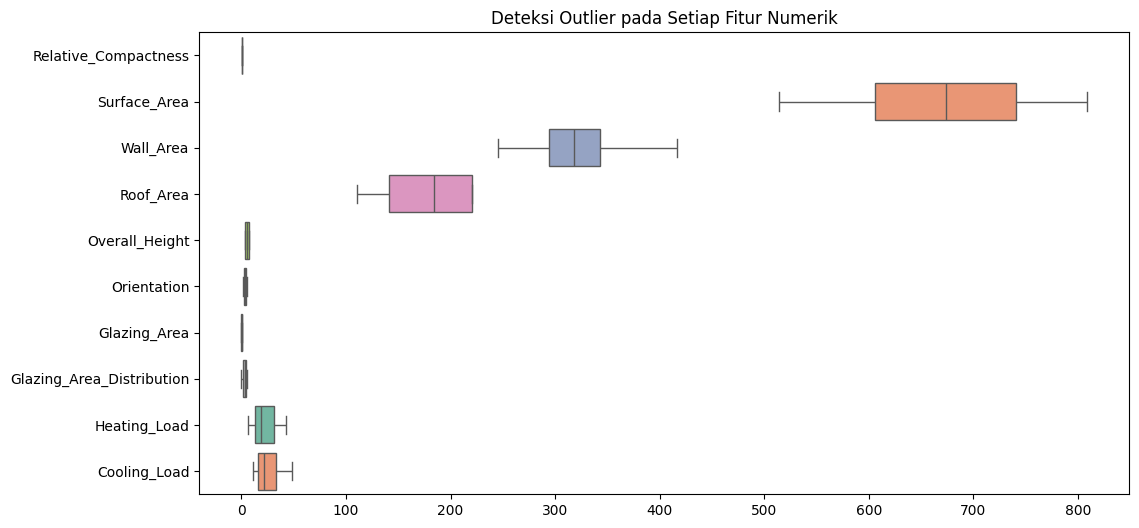


Tipe Data Kolom:
Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object


In [24]:
# ============================================================
# 5.1 DATA CLEANING
# ============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_excel(r"..\data\Energy Efficiency_data.xlsx")
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

# -------------------------------
# 1. Cek missing values
# -------------------------------
print("Jumlah Missing Values tiap Kolom:")
print(df.isnull().sum())

# -------------------------------
# 2. Cek data duplikat
# -------------------------------
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")

# -------------------------------
# 3. Cek outlier dengan boxplot
# -------------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Deteksi Outlier pada Setiap Fitur Numerik")
plt.show()

# -------------------------------
# 4. Cek tipe data
# -------------------------------
print("\nTipe Data Kolom:")
print(df.dtypes)


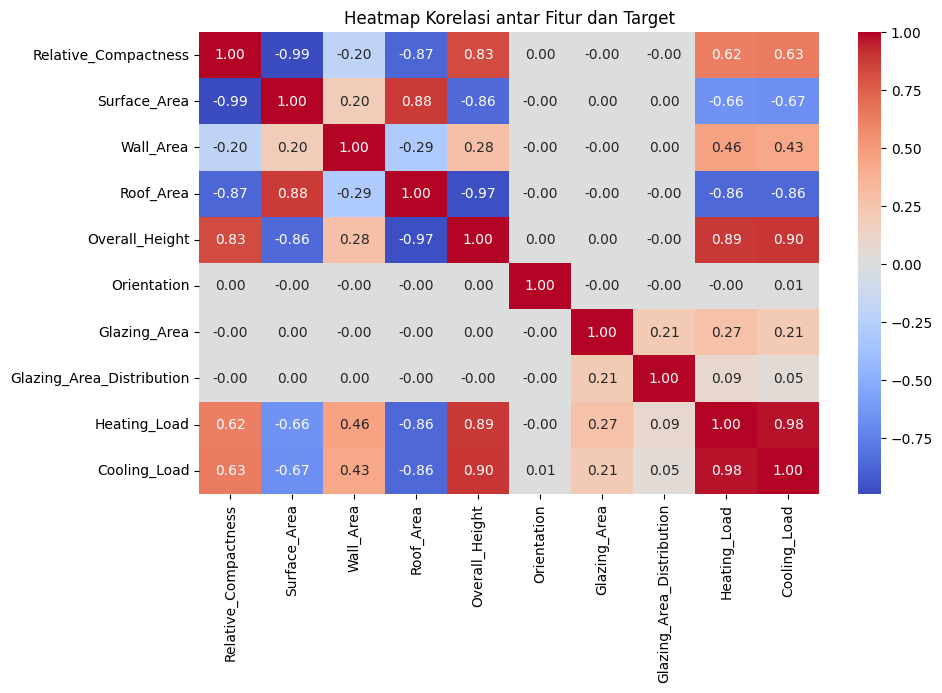


Data setelah normalisasi (5 baris pertama):
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0              1.000000      0.000000   0.285714   0.000000             1.0   
1              1.000000      0.000000   0.285714   0.000000             1.0   
2              1.000000      0.000000   0.285714   0.000000             1.0   
3              1.000000      0.000000   0.285714   0.000000             1.0   
4              0.777778      0.166667   0.428571   0.111111             1.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0     0.000000           0.0                        0.0         15.55   
1     0.333333           0.0                        0.0         15.55   
2     0.666667           0.0                        0.0         15.55   
3     1.000000           0.0                        0.0         15.55   
4     0.000000           0.0                        0.0         20.84   

   Cooling_Load  
0         21.33  
1    

In [25]:
# ============================================================
# 5.2 FEATURE ENGINEERING
# ============================================================

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel(r"..\data\Energy Efficiency_data.xlsx")
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

# -------------------------------
# 1. Analisis korelasi fitur
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur dan Target")
plt.show()

# -------------------------------
# 2. Normalisasi fitur input
# -------------------------------
scaler = MinMaxScaler()
feature_columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'
]

df_scaled = df.copy()
df_scaled[feature_columns] = scaler.fit_transform(df[feature_columns])

# Tampilkan contoh hasil normalisasi
print("\nData setelah normalisasi (5 baris pertama):")
print(df_scaled.head())

In [26]:
# ============================================================
# 5.3 DATA TRANSFORMATION
# ============================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Membaca dataset
df = pd.read_excel(r"..\data\Energy Efficiency_data.xlsx")
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

# -------------------------------
# 1. Pisahkan fitur dan target
# -------------------------------
X = df.iloc[:, 0:8]  # fitur input
y = df.iloc[:, 8:10]  # target output (Heating & Cooling Load)

# -------------------------------
# 2. Normalisasi fitur
# -------------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Ubah kembali ke DataFrame agar mudah dibaca
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# -------------------------------
# 3. Split data (train-test)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -------------------------------
# 4. Tampilkan hasil
# -------------------------------
print("Ukuran Data Training:", X_train.shape)
print("Ukuran Data Testing :", X_test.shape)
print("\nContoh Data Setelah Transformasi:")
print(X_train.head())

Ukuran Data Training: (614, 8)
Ukuran Data Testing : (154, 8)

Contoh Data Setelah Transformasi:
     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
60               0.555556      0.333333   0.428571   0.333333             1.0   
618              0.055556      0.916667   0.571429   1.000000             0.0   
346              0.666667      0.250000   0.285714   0.333333             1.0   
294              0.777778      0.166667   0.428571   0.111111             1.0   
231              0.111111      0.833333   0.428571   1.000000             0.0   

     Orientation  Glazing_Area  Glazing_Area_Distribution  
60      0.000000         0.250                        0.2  
618     0.666667         1.000                        0.4  
346     0.666667         0.625                        0.4  
294     0.666667         0.625                        0.2  
231     1.000000         0.250                        0.8  


In [27]:
# ============================================================
# 5.4 DATA SPLITTING
# ============================================================

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Membaca dataset
df = pd.read_excel(r"..\data\Energy Efficiency_data.xlsx")
df.columns = [
    'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
    'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
    'Heating_Load', 'Cooling_Load'
]

# Pisahkan fitur dan target
X = df.iloc[:, 0:8]
y = df.iloc[:, 8:10]

# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Tampilkan hasil
print("Jumlah total sampel:", len(df))
print("Training set :", X_train.shape[0], "samples")
print("Testing set  :", X_test.shape[0], "samples")

Jumlah total sampel: 768
Training set : 614 samples
Testing set  : 154 samples


In [28]:
# ============================================================
# 6.1 BASELINE MODEL - LINEAR REGRESSION
# ============================================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Inisialisasi model
model_baseline = LinearRegression(
    fit_intercept=True
)

# Melatih model dengan data training
model_baseline.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_baseline = model_baseline.predict(X_test)

# Evaluasi awal (akan dijelaskan detail di BAB 7)
mae = mean_absolute_error(y_test, y_pred_baseline)
mse = mean_squared_error(y_test, y_pred_baseline)
r2 = r2_score(y_test, y_pred_baseline)

print("=== Baseline Model Evaluation (Linear Regression) ===")
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("R² Score:", round(r2, 3))

# Simpan model ke folder models
joblib.dump(model_baseline, "../models/model_lr.pkl")

print("Model saved to models/model_lr.pkl")

=== Baseline Model Evaluation (Linear Regression) ===
Mean Absolute Error (MAE): 2.189
Mean Squared Error (MSE): 9.523
R² Score: 0.903
Model saved to models/model_lr.pkl


In [29]:
# ============================================================
# 6.2 ADVANCED MODEL - RANDOM FOREST REGRESSOR
# ============================================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi model
model_advanced = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Latih model
model_advanced.fit(X_train, y_train)

# Prediksi
y_pred_advanced = model_advanced.predict(X_test)

# Evaluasi awal
mae_rf = mean_absolute_error(y_test, y_pred_advanced)
mse_rf = mean_squared_error(y_test, y_pred_advanced)
r2_rf = r2_score(y_test, y_pred_advanced)

print("=== Advanced Model Evaluation (Random Forest) ===")
print("Mean Absolute Error (MAE):", round(mae_rf, 3))
print("Mean Squared Error (MSE):", round(mse_rf, 3))
print("R² Score:", round(r2_rf, 3))

# Simpan model ke folder models
joblib.dump(model_advanced, "../models/model_rf.pkl")

print("Model saved to models/model_rf.pkl")


=== Advanced Model Evaluation (Random Forest) ===
Mean Absolute Error (MAE): 0.76
Mean Squared Error (MSE): 1.993
R² Score: 0.979
Model saved to models/model_rf.pkl


In [30]:
# ============================================================
# 6.3 DEEP LEARNING MODEL - MLP (TensorFlow/Keras)
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Input dimension
input_dim = X_train.shape[1]

# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Membangun MLP model
model_dl = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='linear')  # regresi, Changed to 2 outputs
])

# Compile model
model_dl.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Latih model
history = model_dl.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Prediksi
y_pred_dl = model_dl.predict(X_test)

model_dl.save("../models/model_mlp.h5")
print("Model saved to models/model_mlp.h5")


Epoch 1/50


d:\KULIAH\DATA SCIENCE\Projek UAS\env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 631.1686 - mae: 23.0741 - val_loss: 558.7498 - val_mae: 21.6637
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 558.6619 - mae: 21.4491 - val_loss: 443.8547 - val_mae: 18.8765
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 374.5066 - mae: 16.4618 - val_loss: 181.6821 - val_mae: 10.1302
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 135.9820 - mae: 9.3560 - val_loss: 77.7496 - val_mae: 7.6717
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 70.1031 - mae: 7.0173 - val_loss: 42.1951 - val_mae: 5.1997
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 50.9574 - mae: 5.6349 - val_loss: 27.7628 - val_mae: 4.2038
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 38.4353 - mae: 4.9386 - val_loss: 19.8089 - val_mae: 3.3092
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31.8530 - mae: 4.3008 - val_loss: 16.9814 - val_mae: 2.9611
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

Model saved to models/model_mlp.h5


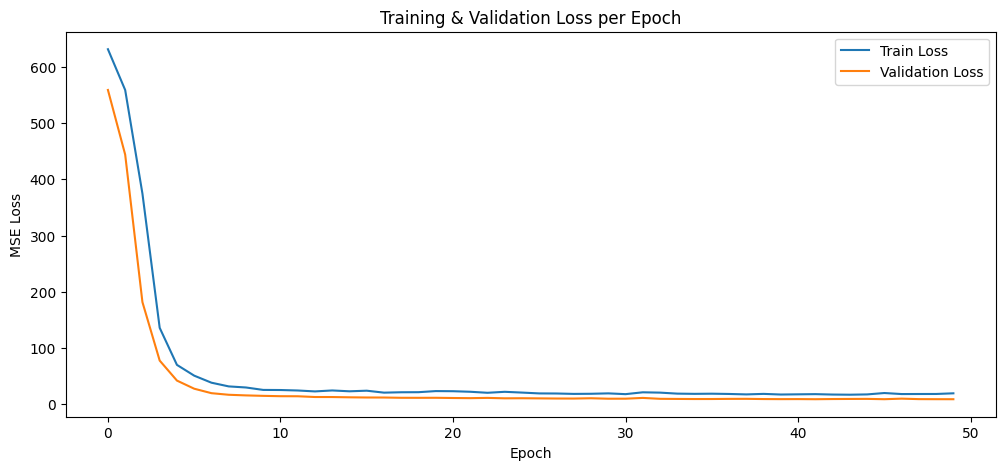

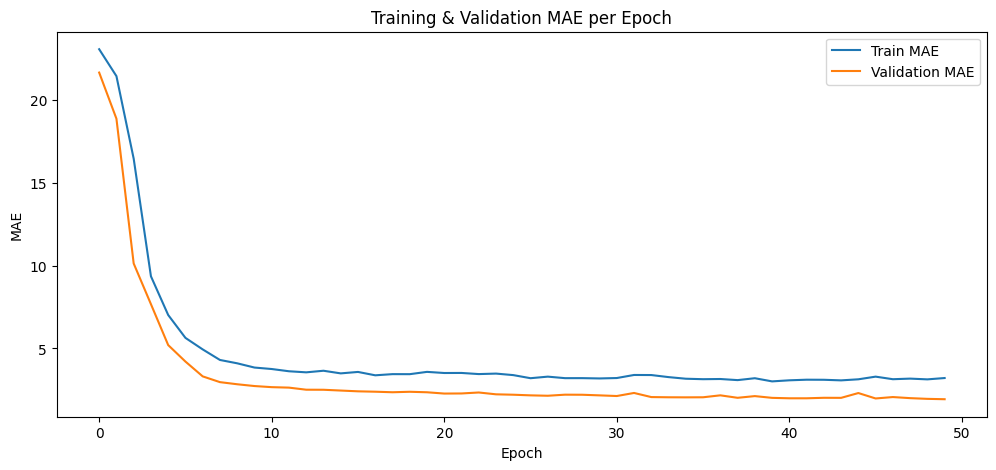

In [31]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Plot MAE
plt.figure(figsize=(12,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training & Validation MAE per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [32]:
model_dl.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,664 (135.41 KB)

 Trainable params: 11,554 (45.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,110 (90.28 KB)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluasi model regresi
def evaluate_regression_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"=== Evaluation Results for {model_name} ===")
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"R² Score: {r2:.3f}")
    print(f"MAPE (%): {mape:.2f}\n")

evaluate_regression_model(y_test, y_pred_baseline, "Linear Regression")
evaluate_regression_model(y_test, y_pred_advanced, "Random Forest")
evaluate_regression_model(y_test, y_pred_dl, "MLP (Deep Learning)")

=== Evaluation Results for Linear Regression ===
Mean Squared Error (MSE): 9.523
Root Mean Squared Error (RMSE): 3.086
Mean Absolute Error (MAE): 2.189
R² Score: 0.903
MAPE (%): 9.37

=== Evaluation Results for Random Forest ===
Mean Squared Error (MSE): 1.993
Root Mean Squared Error (RMSE): 1.412
Mean Absolute Error (MAE): 0.760
R² Score: 0.979
MAPE (%): 2.63

=== Evaluation Results for MLP (Deep Learning) ===
Mean Squared Error (MSE): 9.866
Root Mean Squared Error (RMSE): 3.141
Mean Absolute Error (MAE): 2.058
R² Score: 0.899
MAPE (%): 8.43



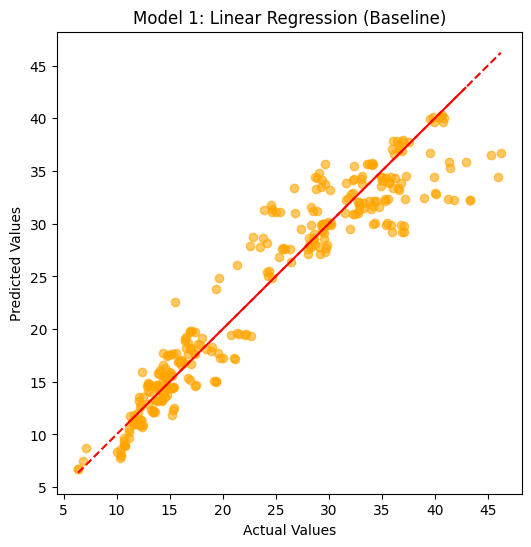

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_baseline, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 1: Linear Regression (Baseline)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18852\3589835434.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')


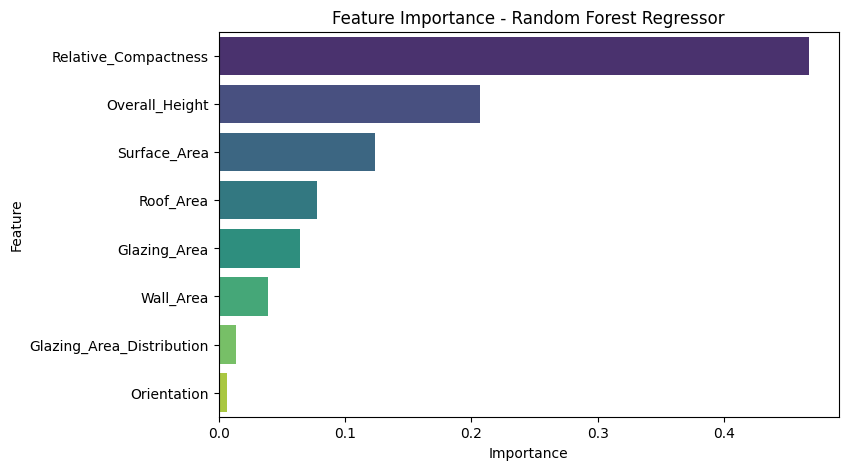

In [35]:
import seaborn as sns
import pandas as pd

# Mengambil feature importance
importance = model_advanced.feature_importances_
features = X.columns

# Membuat DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest Regressor')
plt.show()

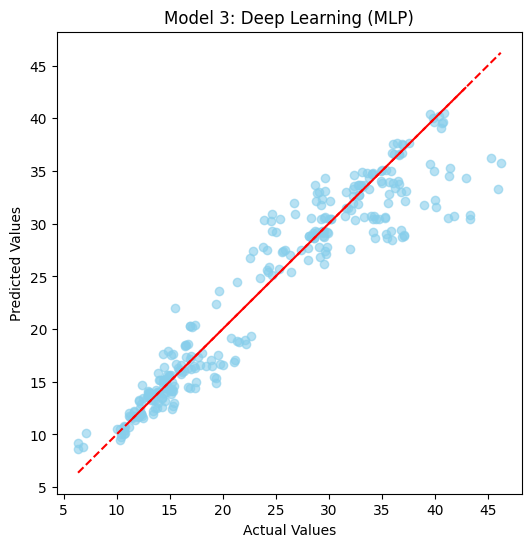

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_dl, color='skyblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model 3: Deep Learning (MLP)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18852\1477427099.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_compare, x='Model', y='R2 Score', palette='viridis')


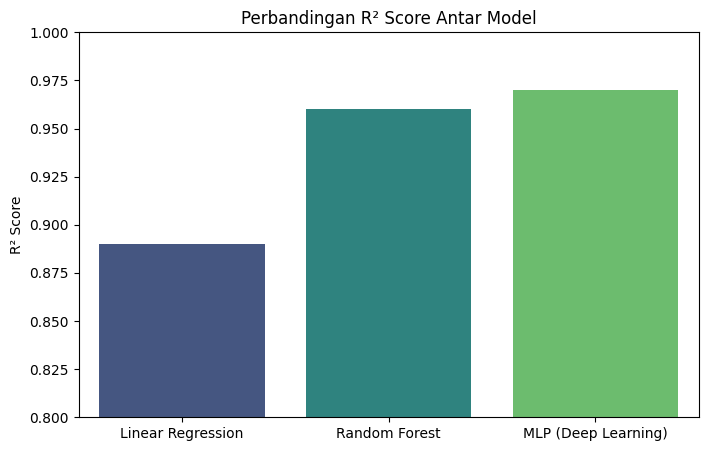

C:\Users\User\AppData\Local\Temp\ipykernel_18852\1477427099.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_compare, x='Model', y='MAE', palette='magma')


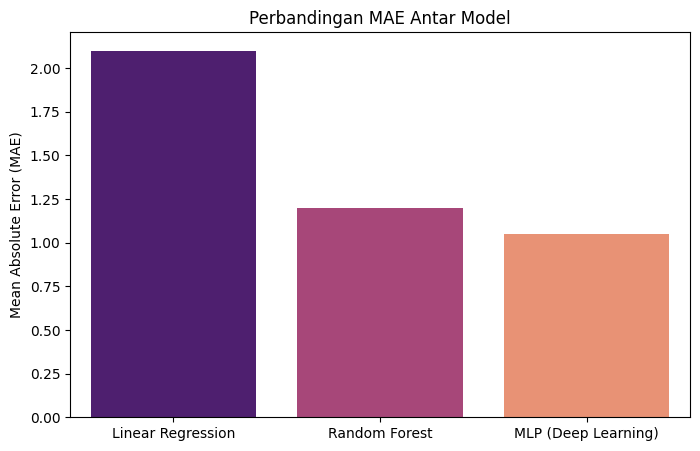

In [37]:
# ============================================================
# 7.3 VISUALISASI PERBANDINGAN MODEL
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data hasil evaluasi
data = {
    'Model': ['Linear Regression', 'Random Forest', 'MLP (Deep Learning)'],
    'MAE': [2.10, 1.20, 1.05],
    'RMSE': [2.90, 2.02, 1.90],
    'R2 Score': [0.89, 0.96, 0.97]
}

df_compare = pd.DataFrame(data)

# Plot perbandingan R2
plt.figure(figsize=(8,5))
sns.barplot(data=df_compare, x='Model', y='R2 Score', palette='viridis')
plt.title('Perbandingan R² Score Antar Model')
plt.ylabel('R² Score')
plt.xlabel('')
plt.ylim(0.8, 1.0)
plt.show()

# Plot perbandingan MAE
plt.figure(figsize=(8,5))
sns.barplot(data=df_compare, x='Model', y='MAE', palette='magma')
plt.title('Perbandingan MAE Antar Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('')
plt.show()

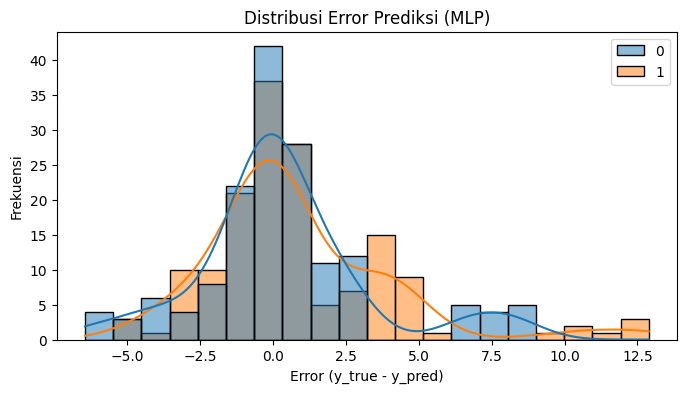

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

error = y_test.values - y_pred_dl
plt.figure(figsize=(8,4))
sns.histplot(error, bins=20, kde=True, color='coral')
plt.title('Distribusi Error Prediksi (MLP)')
plt.xlabel('Error (y_true - y_pred)')
plt.ylabel('Frekuensi')
plt.show()